In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## INTRODUCTION
Welcome to my comprehensive analysis of the Titanic dataset! 🚢 In this notebook, we will:
> Conduct Exploratory Data Analysis (EDA)
> Handle missing values
> Perform Feature Engineering
> Apply a variety of Machine Learning models including Neural Networks
  1. DECISTION TREES
  2. RANDOM FOREST
  3. XGB 
  4. CAT BOOSTING
  5. NEURAL NETWORKS
> Conduct Hyperparameter Tuning
> Evaluate and compare model performance
Let's dive into the data and uncover insights that could help predict the survival of passengers.

## IMPORTS AND DATA LOADING

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from catboost import CatBoostClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

2024-07-12 07:49:22.419077: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 07:49:22.419253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 07:49:22.600886: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

print(train_data.shape)
print(test_data.shape)

(891, 12)
(418, 11)


In [5]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
print("TRAIN_DATA\n")
for cols in train_data.columns:
    print(f"Number of unique values in the column {cols} = {train_data[cols].nunique()}")
print("\nTEST_DATA\n")
for cols in test_data.columns:
    print(f"Number of unique values in the column {cols} = {test_data[cols].nunique()}")

TRAIN_DATA

Number of unique values in the column PassengerId = 891
Number of unique values in the column Survived = 2
Number of unique values in the column Pclass = 3
Number of unique values in the column Name = 891
Number of unique values in the column Sex = 2
Number of unique values in the column Age = 88
Number of unique values in the column SibSp = 7
Number of unique values in the column Parch = 7
Number of unique values in the column Ticket = 681
Number of unique values in the column Fare = 248
Number of unique values in the column Cabin = 147
Number of unique values in the column Embarked = 3

TEST_DATA

Number of unique values in the column PassengerId = 418
Number of unique values in the column Pclass = 3
Number of unique values in the column Name = 418
Number of unique values in the column Sex = 2
Number of unique values in the column Age = 79
Number of unique values in the column SibSp = 7
Number of unique values in the column Parch = 8
Number of unique values in the column 

In [12]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [13]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survied:", rate_men)

% of men who survied: 0.18890814558058924


In [14]:
categorical_columns = ['Pclass','Sex','SibSp','Parch','Embarked']

In [15]:
print("TRAIN : CATEGORICAL DATA\n")
for cols in categorical_columns:
    print(f"Unique values in {cols} are = {train_data[cols].unique()}")

print(f"Unique values in Survived are = {train_data.Survived.unique()}")
# print("\nTEST\n")
# for cols in categorical_columns:
#     print(f"Unique values in {cols} are = {test[cols].unique()}")

TRAIN : CATEGORICAL DATA

Unique values in Pclass are = [3 1 2]
Unique values in Sex are = ['male' 'female']
Unique values in SibSp are = [1 0 3 4 2 5 8]
Unique values in Parch are = [0 1 2 5 3 4 6]
Unique values in Embarked are = ['S' 'C' 'Q' nan]
Unique values in Survived are = [0 1]


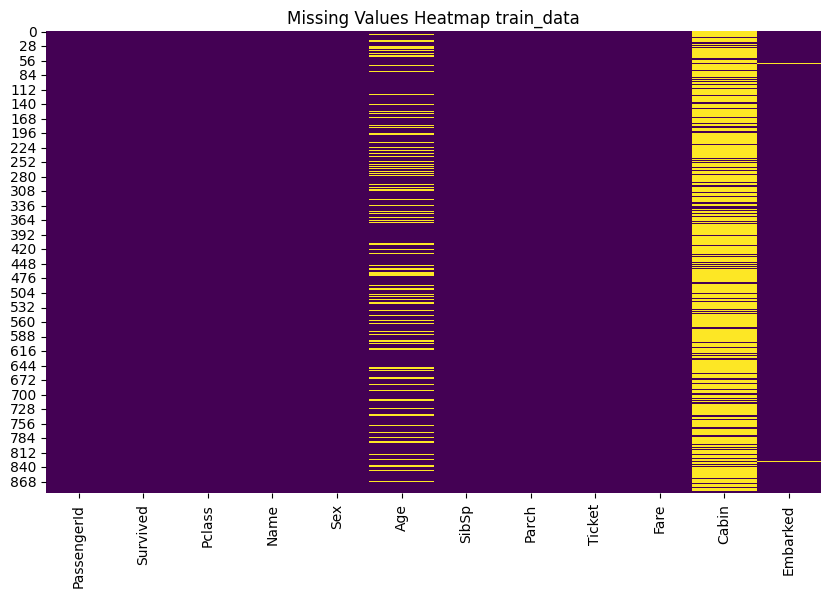

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap train_data')
plt.show()

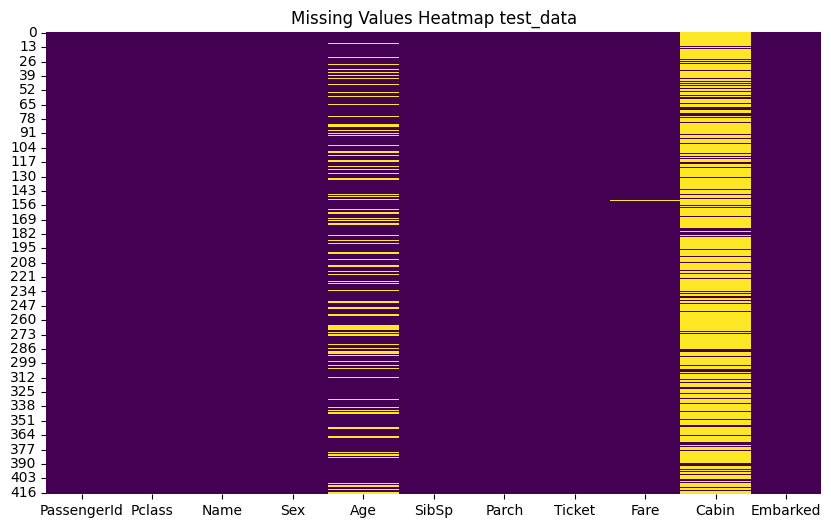

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(test_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap test_data')
plt.show()

ENCODING CATEGORICAL COLUMNS SEX AND EMBARKED

In [18]:
train_data['Sex'] = train_data.Sex.map({'male': 1, 'female': 0})
train_data['Embarked'] = train_data.Embarked.map({'S':1,'C':2, 'Q':3})
test_data['Sex'] = test_data.Sex.map({'male': 1, 'female': 0})
test_data['Embarked'] = test_data.Embarked.map({'S':1,'C':2, 'Q':3, np.nan:0})

In [19]:
train_data['Embarked']=train_data.Embarked.fillna(train_data.Embarked.mode()[0])

In [20]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

DROP CABIN VALUE SINCE ITS MOSTY CONTAINS NAN VALUES

In [21]:
train_data.drop('Cabin',axis=1,inplace=True)
test_data.drop('Cabin',axis=1,inplace=True)

Since Age is a continuos variable and does not contains as many null values as cabins, it cannot be ignored. We'll handle the missing values in Age later, once we analyse the data.
PassengerId and Ticket column do not contain any important information. So let's drop them.



In [22]:
 train_data.drop(["PassengerId",'Ticket'],axis=1,inplace=True)
test_data.drop(["PassengerId", "Ticket"],axis=1,inplace=True)

In [23]:
train_data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked    float64
dtype: object

In [24]:
test_data.dtypes

Pclass        int64
Name         object
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

## DATA INTERPRETATION


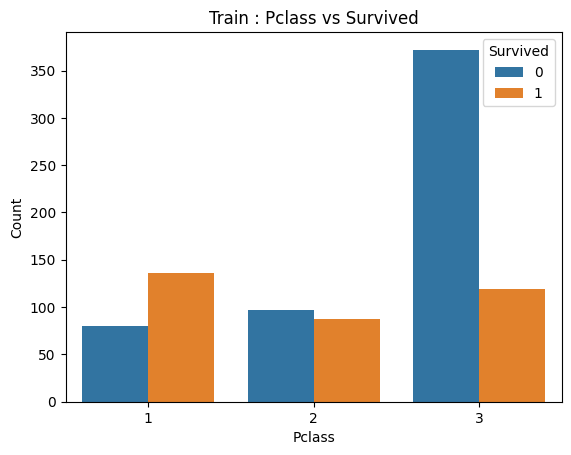

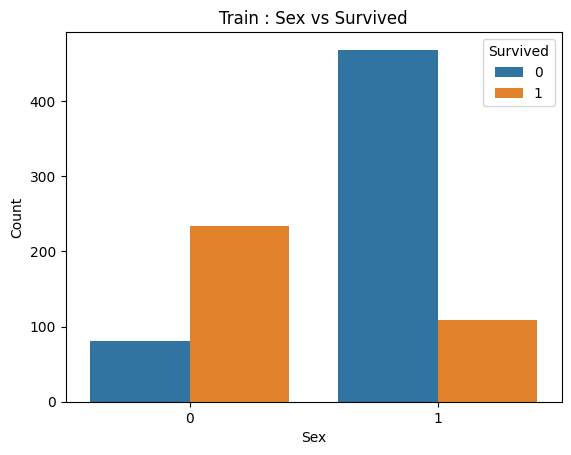

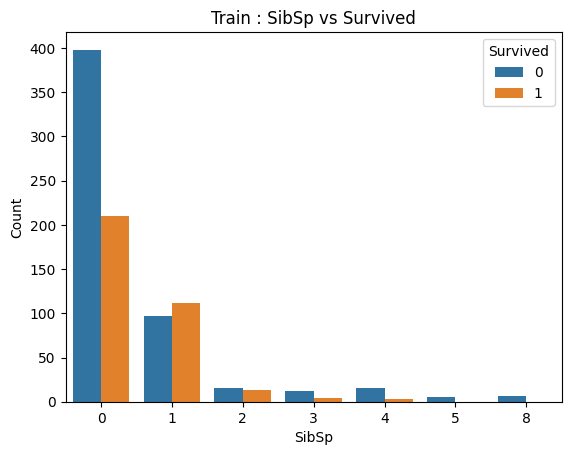

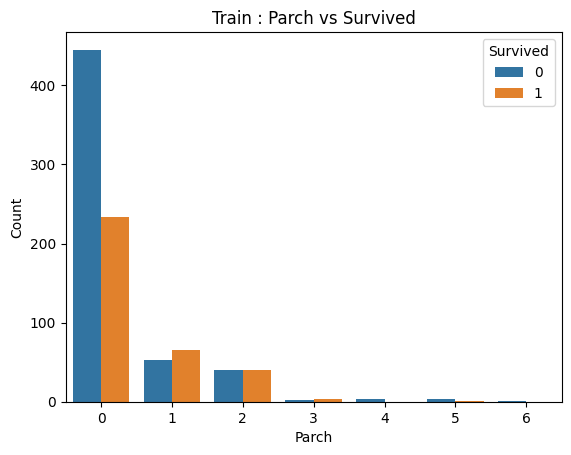

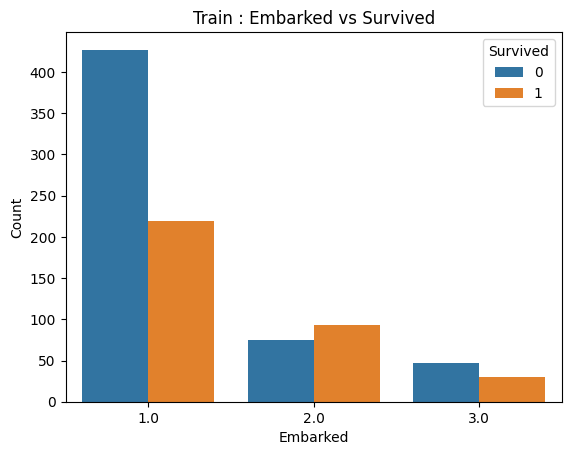

In [25]:
for cols in categorical_columns:
    sns.countplot(x=cols, hue='Survived', data=train_data)
    plt.title(f'Train : {cols} vs Survived')
    plt.xlabel(f'{cols}')
    plt.ylabel('Count')
    plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


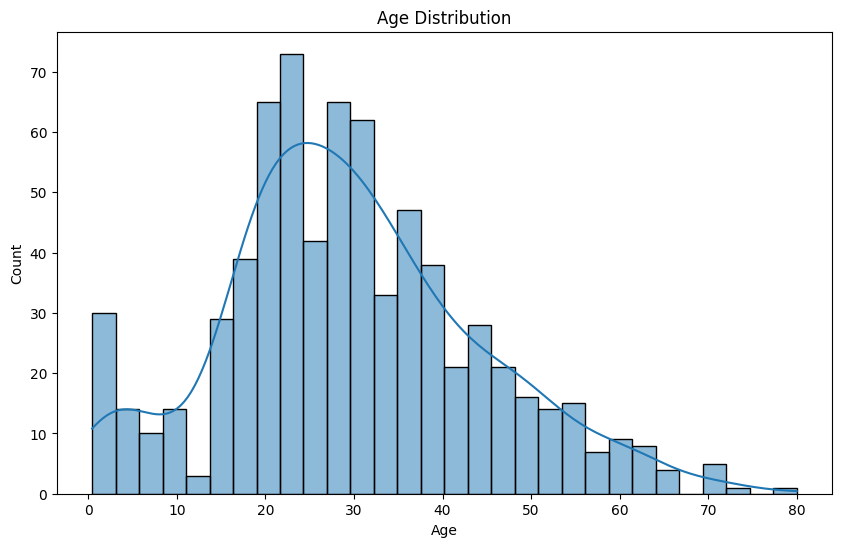

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

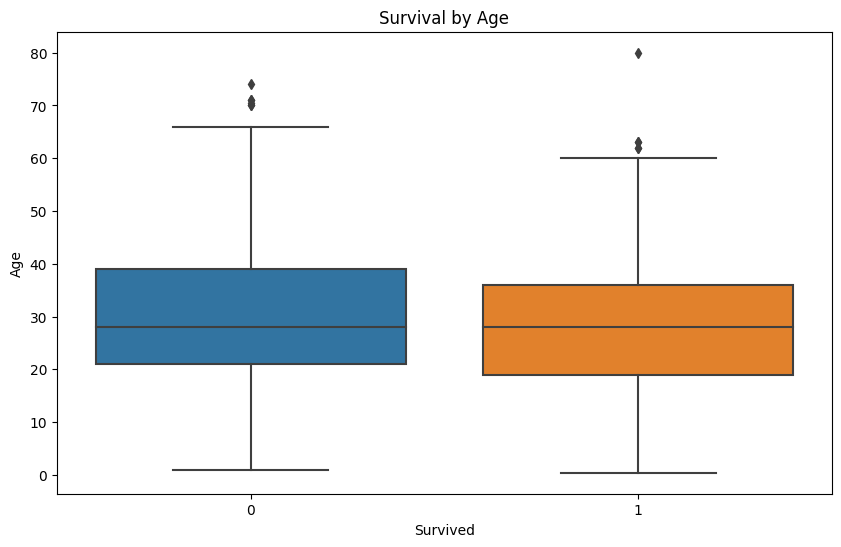

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Survival by Age')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


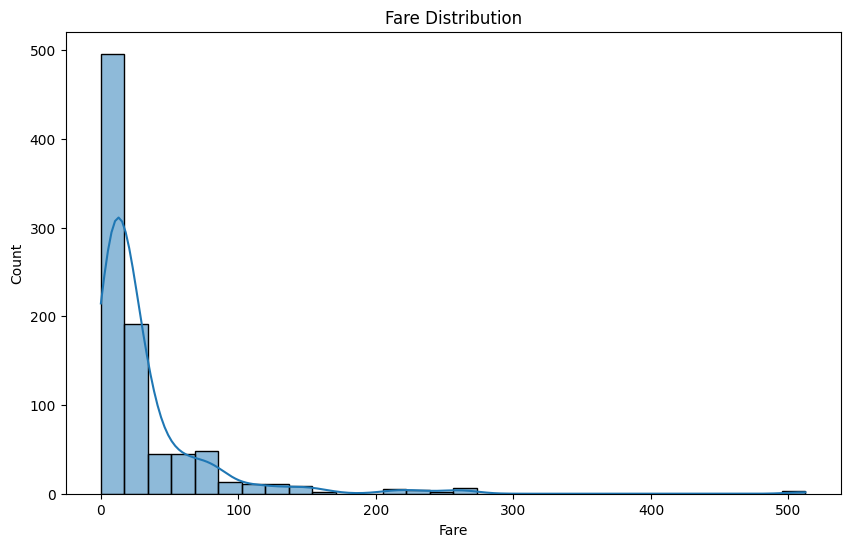

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

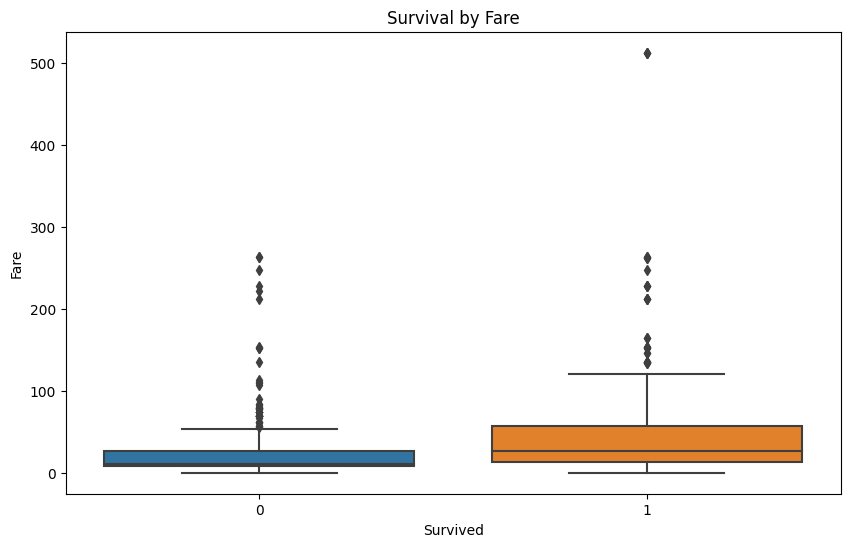

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', data=train_data)
plt.title('Survival by Fare')
plt.show()

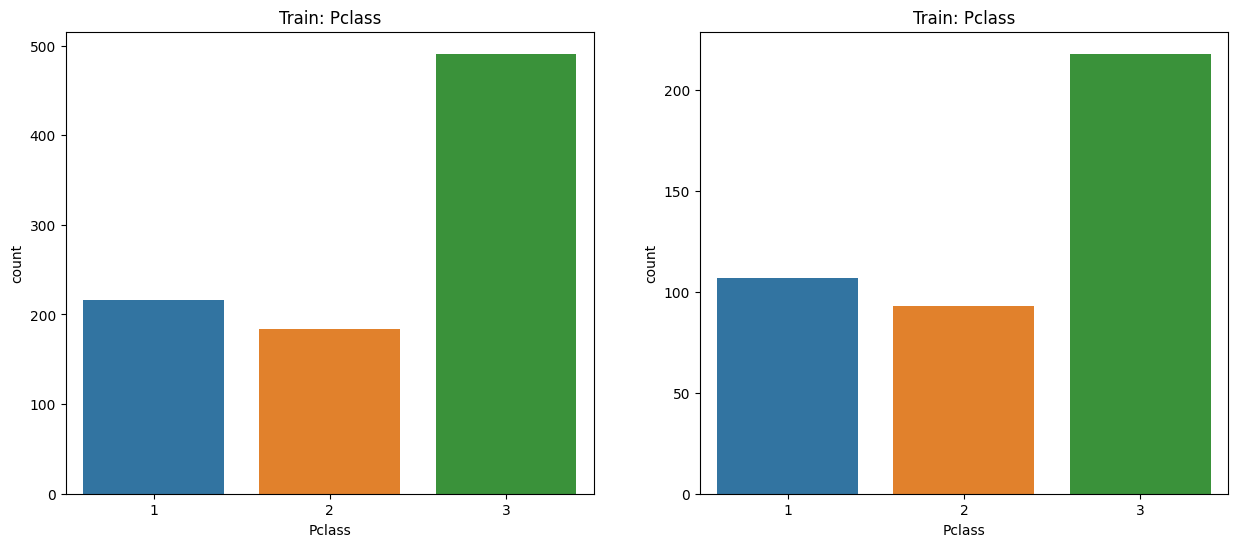

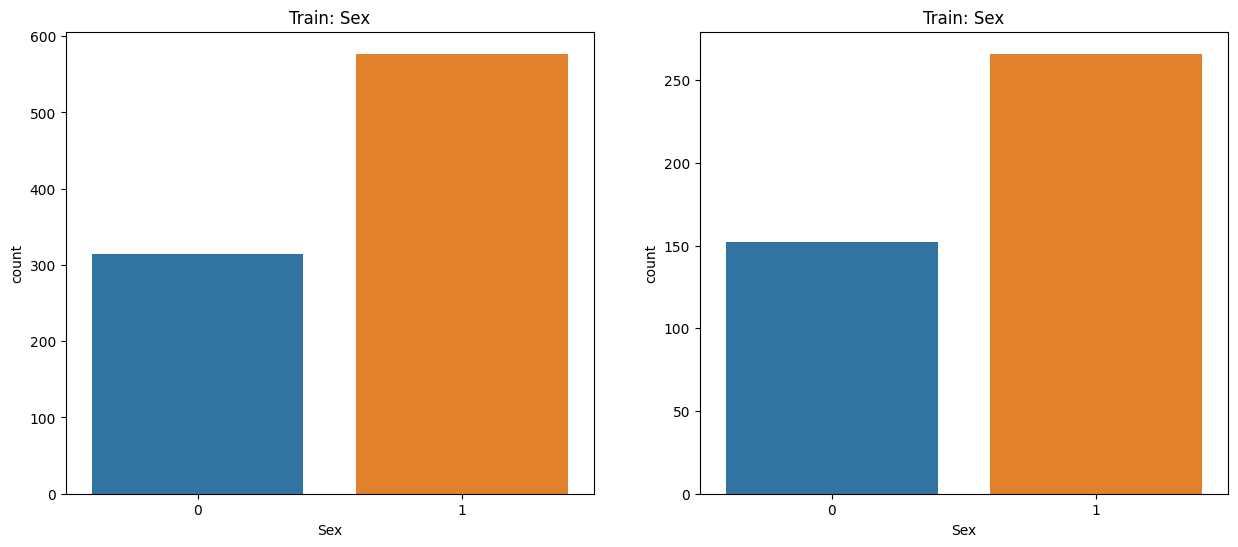

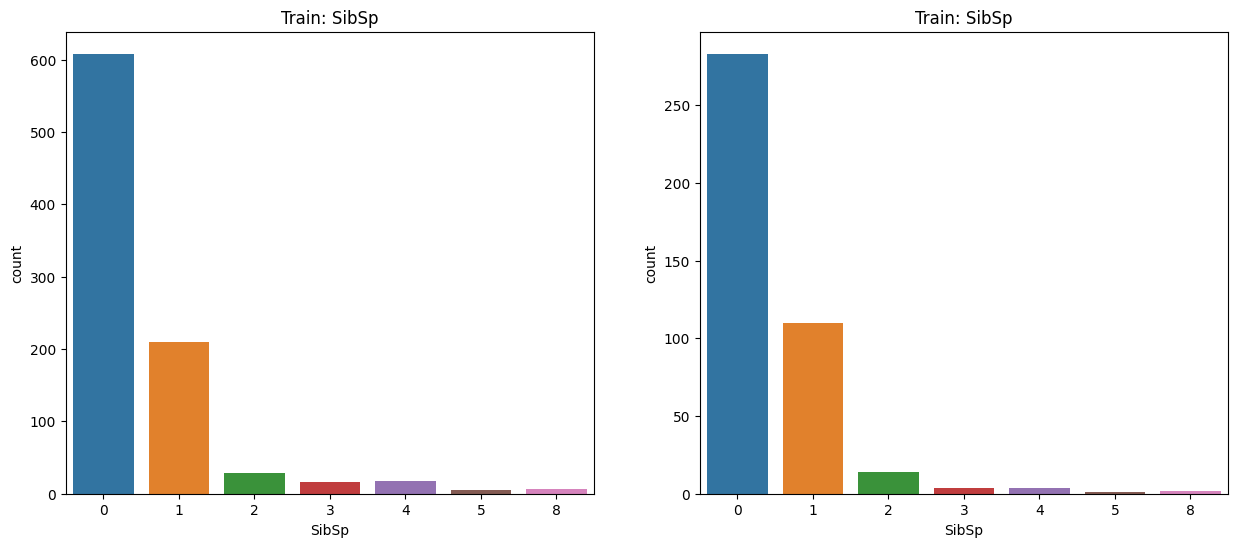

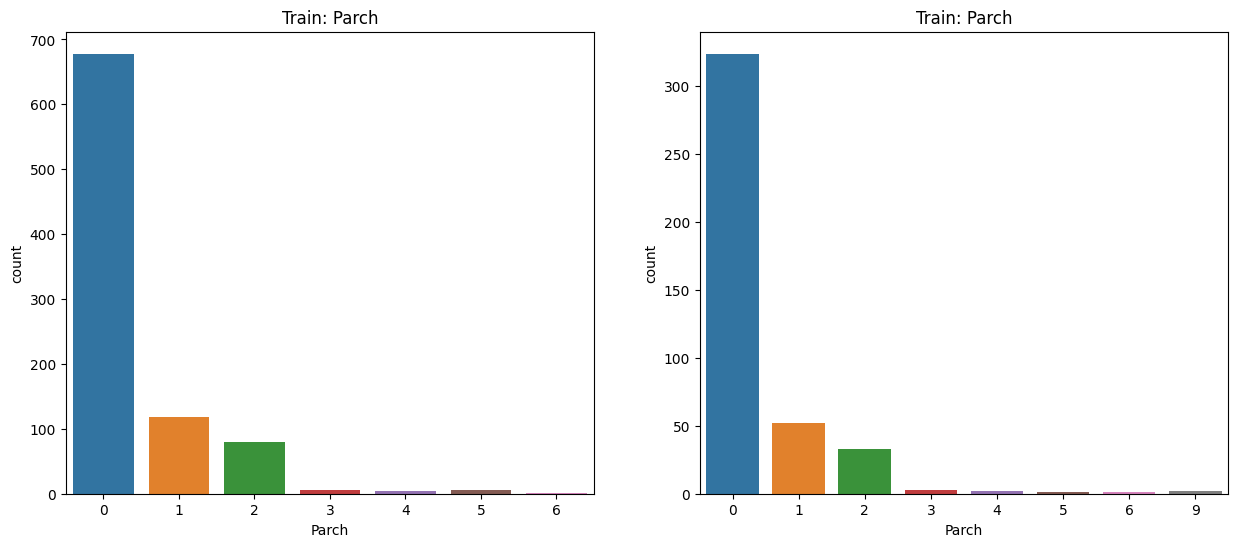

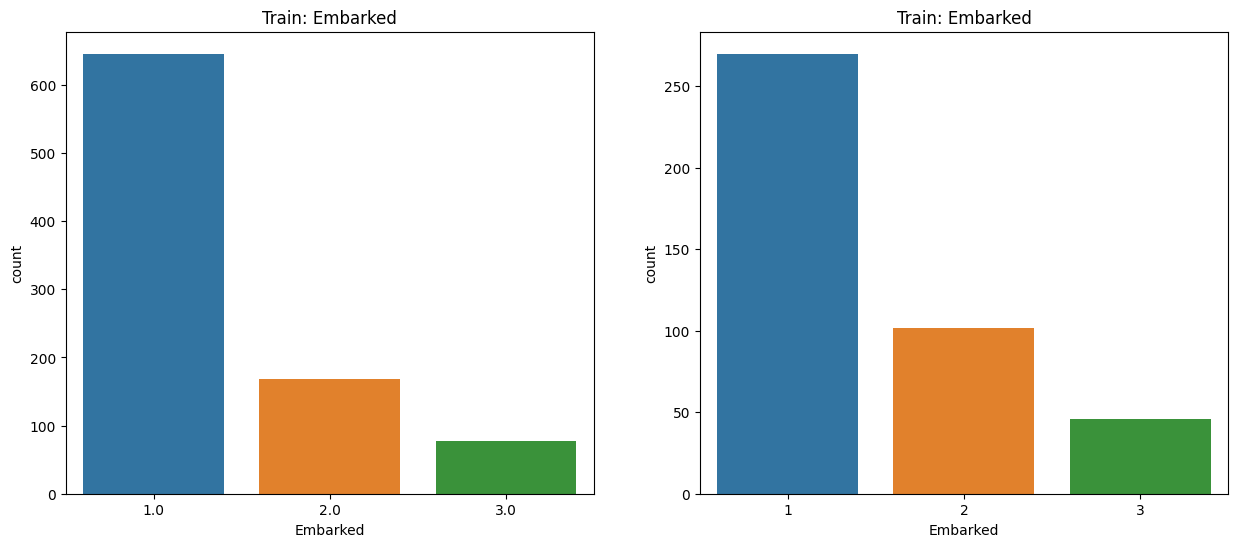

In [30]:
for col in categorical_columns:
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=train_data)
    plt.title(f'Train: {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('count')    
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=col, data=test_data)
    plt.title(f'Train: {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('count') 
    plt.show()


> Hence, **DATA DISTRIBUTION IN BOTH TEST AND TRAIN IS SAME**

In [31]:
df_corr = train_data.drop(['Name'] ,axis=1)
corr_matrix = df_corr.corr()

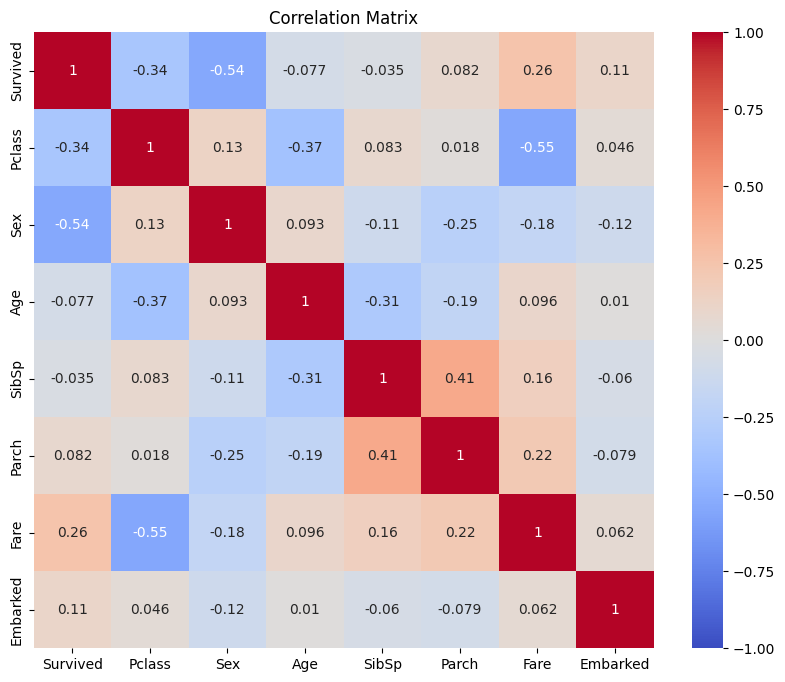

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [33]:
corr_matrix.Survived.abs().sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Pclass      0.338481
Fare        0.257307
Embarked    0.106811
Parch       0.081629
Age         0.077221
SibSp       0.035322
Name: Survived, dtype: float64

Minor Analysis

In [34]:
SibSp8_train = train_data[(train_data.SibSp == 8) | (train_data.SibSp == 5)]
SibSp8_test = test_data[(test_data.SibSp == 8) | (test_data.SibSp == 5)]
Parch_4_6_train = train_data[(train_data.Parch == 4) | (train_data.Parch == 6)]
Parch_4_6_test = test_data[(test_data.Parch == 4) | (test_data.Parch == 6)]

In [35]:
SibSp8_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
59,0,3,"Goodwin, Master. William Frederick",1,11.0,5,2,46.90,1.0
71,0,3,"Goodwin, Miss. Lillian Amy",0,16.0,5,2,46.90,1.0
159,0,3,"Sage, Master. Thomas Henry",1,NaN,8,2,69.55,1.0
180,0,3,"Sage, Miss. Constance Gladys",0,NaN,8,2,69.55,1.0
201,0,3,"Sage, Mr. Frederick",1,NaN,8,2,69.55,1.0
324,0,3,"Sage, Mr. George John Jr",1,NaN,8,2,69.55,1.0
386,0,3,"Goodwin, Master. Sidney Leonard",1,1.0,5,2,46.90,1.0
480,0,3,"Goodwin, Master. Harold Victor",1,9.0,5,2,46.90,1.0
683,0,3,"Goodwin, Mr. Charles Edward",1,14.0,5,2,46.90,1.0
792,0,3,"Sage, Miss. Stella Anna",0,NaN,8,2,69.55,1.0


In [36]:
SibSp8_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
140,3,"Goodwin, Miss. Jessie Allis",0,10.0,5,2,46.90,1
188,3,"Sage, Miss. Ada",0,NaN,8,2,69.55,1
360,3,"Sage, Master. William Henry",1,14.5,8,2,69.55,1


In [37]:
Parch_4_6_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
167,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",0,45.0,1,4,27.900,1.0
360,0,3,"Skoog, Mr. Wilhelm",1,40.0,1,4,27.900,1.0
438,0,1,"Fortune, Mr. Mark",1,64.0,1,4,263.000,1.0
567,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.075,1.0
678,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",0,43.0,1,6,46.900,1.0


In [38]:
Parch_4_6_test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
69,1,"Fortune, Mrs. Mark (Mary McDougald)",0,60.0,1,4,263.0000,1
132,3,"Lefebre, Mrs. Frank (Frances)",0,NaN,0,4,25.4667,1
139,3,"Goodwin, Mr. Charles Frederick",1,40.0,1,6,46.9000,1


In [39]:
SibSp8_train = train_data[(train_data.SibSp == 2) | (train_data.SibSp == 3)]
SibSp8_test = test_data[(test_data.SibSp == 3) | (test_data.SibSp == 2)]
Parch_4_6_train = train_data[(train_data.Parch == 2) | (train_data.Parch == 3)]
Parch_4_6_test = test_data[(test_data.Parch == 2) | (test_data.Parch == 3)]

In [40]:
SibSp8_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
7,0,3,"Palsson, Master. Gosta Leonard",1,2.00,3,1,21.0750,1.0
24,0,3,"Palsson, Miss. Torborg Danira",0,8.00,3,1,21.0750,1.0
27,0,1,"Fortune, Mr. Charles Alexander",1,19.00,3,2,263.0000,1.0
38,0,3,"Vander Planke, Miss. Augusta Maria",0,18.00,2,0,18.0000,1.0
48,0,3,"Samaan, Mr. Youssef",1,NaN,2,0,21.6792,2.0
63,0,3,"Skoog, Master. Harald",1,4.00,3,2,27.9000,1.0
69,0,3,"Kink, Mr. Vincenz",1,26.00,2,0,8.6625,1.0
85,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",0,33.00,3,0,15.8500,1.0
88,1,1,"Fortune, Miss. Mabel Helen",0,23.00,3,2,263.0000,1.0
104,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.00,2,0,7.9250,1.0


In [41]:
Parch_4_6_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,1.0
27,0,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,263.0000,1.0
43,1,2,"Laroche, Miss. Simonne Marie Anne Andree",0,3.0,1,2,41.5792,2.0
58,1,2,"West, Miss. Constance Mirium",0,5.0,1,2,27.7500,1.0
59,0,3,"Goodwin, Master. William Frederick",1,11.0,5,2,46.9000,1.0
...,...,...,...,...,...,...,...,...,...
846,0,3,"Sage, Mr. Douglas Bullen",1,NaN,8,2,69.5500,1.0
850,0,3,"Andersson, Master. Sigvard Harald Elias",1,4.0,4,2,31.2750,1.0
858,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",0,24.0,0,3,19.2583,2.0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,69.5500,1.0


## Feature engineering

> **Since, the Age column has few missing values and we didn't handle it yet. Let's perform some feature engineering as on Age first and get rid of null values.**


In [42]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2.0
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1.0
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1.0


> **We can extract the initials from the name for further analysis.**

In [43]:
train_data['Initials'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_data.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [44]:
test_data['Initials'] = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_data.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [45]:
title_mapping = {
    'Mlle': 'Miss', 'Mme': 'Miss', 'Ms': 'Miss', 'Dr': 'Mr', 'Major': 'Mr', 'Lady': 'Mrs',
    'Countess': 'Mrs', 'Jonkheer': 'Other', 'Col': 'Other', 'Rev': 'Other', 'Capt': 'Mr',
    'Sir': 'Mr', 'Don': 'Mr'
}
train_data['Initials'] = train_data['Initials'].replace(title_mapping)

In [46]:
test_title_mapping = {
    'Ms': 'Miss', 'Dr': 'Mr', 'Col': 'Mr', 'Rev': 'Other', 'Dona': 'Other'
}
test_data['Initials'] = test_data['Initials'].replace(test_title_mapping)

In [47]:
train_data.groupby('Initials')['Age'].mean()

Initials
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [48]:
test_data.groupby('Initials')['Age'].mean()

Initials
Master     7.406471
Miss      21.774844
Mr        32.306452
Mrs       38.903226
Other     36.666667
Name: Age, dtype: float64

In [49]:
age_fill_values = {
    'Mr': 33,
    'Mrs': 36,
    'Master': 5,
    'Miss': 22,
    'Other': 46
}

# Apply the imputation
train_data['Age'] = train_data.apply(lambda row: age_fill_values[row['Initials']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [50]:
test_age_fill_values = {
    'Mr': 33,
    'Mrs': 39,
    'Master': 7,
    'Miss': 22,
    'Other': 47
}

# Apply the imputation
test_data['Age'] = test_data.apply(lambda row: age_fill_values[row['Initials']] if pd.isnull(row['Age']) else row['Age'], axis=1)


In [51]:
train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initials    0
dtype: int64

In [52]:
print(train_data.Age.describe())
print("\nClearly, the passenger's age varies from 0.42 year to 80 years. We can divide the continuos age into 8 classes,\ntaking class interval of each class to be 10.")

count    891.000000
mean      29.841942
std       13.281525
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

Clearly, the passenger's age varies from 0.42 year to 80 years. We can divide the continuos age into 8 classes,
taking class interval of each class to be 10.


In [53]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80,float('inf')]
labels = [1, 2, 3, 4, 5, 6, 7, 8,9]

# Create the Age_Group column using pd.cut, handling NaN separately
train_data['Age_Group'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Convert the categorical data to integers, while keeping NaN values as they are
train_data['Age_Group'] = train_data['Age_Group'].astype('Int64')

In [54]:
test_data['Age_Group'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Convert the categorical data to integers, while keeping NaN values as they are
test_data['Age_Group'] = test_data['Age_Group'].astype('Int64')

In [55]:
train_data.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
Initials     0
Age_Group    0
dtype: int64

In [56]:
test_data.isnull().sum()

Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         1
Embarked     0
Initials     0
Age_Group    0
dtype: int64

In [57]:
test_data['Fare'] = test_data.Fare.fillna(test_data.Fare.mean())

In [58]:
train_data["Total_family_size"] = train_data.SibSp + train_data.Parch

In [59]:
test_data["Total_family_size"] = test_data.SibSp + test_data.Parch

In [60]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1.0,Mr,3,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2.0,Mrs,4,1
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1.0,Miss,3,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1.0,Mrs,4,1
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1.0,Mr,4,0


In [61]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3,Mr,4,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1,Mrs,5,1
2,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3,Mr,7,0
3,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1,Mr,3,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1,Mrs,3,2


In [62]:
train_data.Total_family_size.unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [63]:
test_data.Total_family_size.unique()

array([ 0,  1,  2,  4,  3,  5,  7,  6, 10])

In [64]:
train_data.Initials.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [65]:
train_data['Initials'] = train_data.Initials.map({'Mr':1, 'Mrs':4, 'Miss':3, 'Master':2, 'Other':5})

In [66]:
test_data['Initials'] = test_data.Initials.map({'Mr':1, 'Mrs':4, 'Miss':3, 'Master':2, 'Other':5})

In [67]:
df = train_data.drop('Name',axis=1)

In [68]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,0,3,1,22.0,1,0,7.2500,1.0,1,3,1
1,1,1,0,38.0,1,0,71.2833,2.0,4,4,1
2,1,3,0,26.0,0,0,7.9250,1.0,3,3,0
3,1,1,0,35.0,1,0,53.1000,1.0,4,4,1
4,0,3,1,35.0,0,0,8.0500,1.0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1.0,5,3,0
887,1,1,0,19.0,0,0,30.0000,1.0,3,2,0
888,0,3,0,22.0,1,2,23.4500,1.0,3,3,3
889,1,1,1,26.0,0,0,30.0000,2.0,1,3,0


In [69]:
df_test = test_data.drop(['Name'],axis=1)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,3,1,34.5,0,0,7.8292,3,1,4,0
1,3,0,47.0,1,0,7.0000,1,4,5,1
2,2,1,62.0,0,0,9.6875,3,1,7,0
3,3,1,27.0,0,0,8.6625,1,1,3,0
4,3,0,22.0,1,1,12.2875,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...
413,3,1,33.0,0,0,8.0500,1,1,4,0
414,1,0,39.0,0,0,108.9000,2,5,4,0
415,3,1,38.5,0,0,7.2500,1,1,4,0
416,3,1,33.0,0,0,8.0500,1,1,4,0


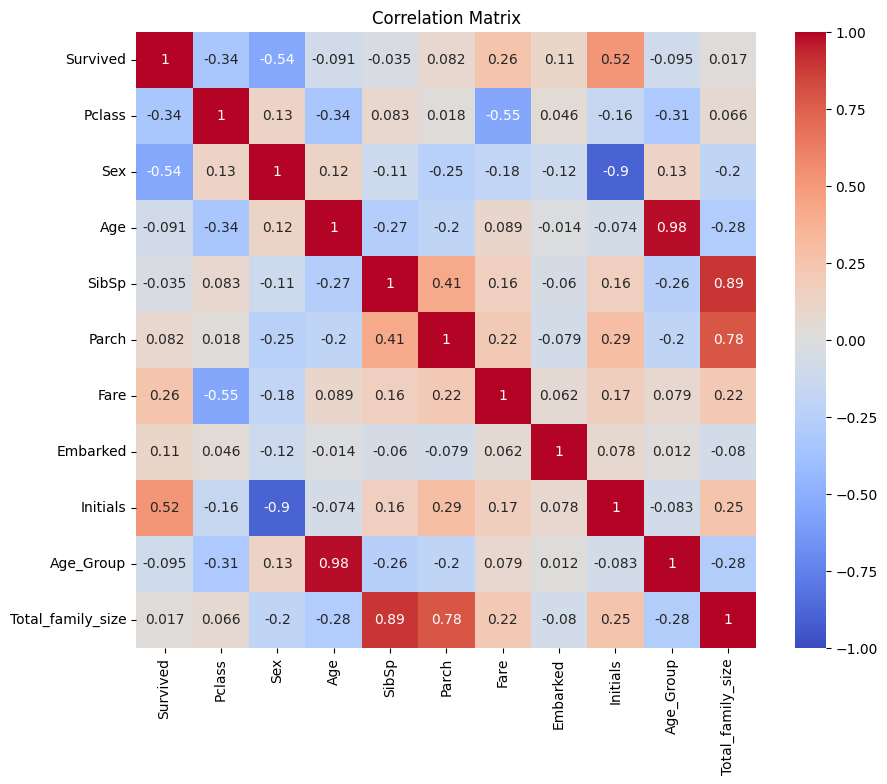

In [70]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## TRAINING AND TESTING

In [71]:
X = df.drop('Survived',axis=1)
y = df.Survived

In [72]:
scaler = StandardScaler()
X[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']] = scaler.fit_transform(
    X[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']]
)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
331,1,1,1.179597,-0.474545,-0.473674,-0.074583,1.0,1,1.134737,-0.560975
733,2,1,-0.515437,-0.474545,-0.473674,-0.386671,1.0,1,-0.363116,-0.560975
382,3,1,0.162577,-0.474545,-0.473674,-0.488854,1.0,1,0.385810,-0.560975
704,3,1,-0.289432,0.432793,-0.473674,-0.490280,1.0,1,-0.363116,0.059160
813,3,0,-1.796129,3.154809,2.008933,-0.018709,1.0,3,-1.860968,3.159833
...,...,...,...,...,...,...,...,...,...,...
106,3,0,-0.666106,-0.474545,-0.473674,-0.494391,1.0,3,-0.363116,-0.560975
270,1,1,0.237912,-0.474545,-0.473674,-0.024246,1.0,1,0.385810,-0.560975
860,3,1,0.840591,1.340132,-0.473674,-0.364355,1.0,1,1.134737,0.679295
435,1,0,-1.193450,0.432793,2.008933,1.767741,1.0,3,-1.112042,1.299429


In [75]:
X_train.isnull().sum()

Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             0
Initials             0
Age_Group            0
Total_family_size    0
dtype: int64

In [76]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

## DECISION TREE

In [77]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print(f'Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.4f}')

Decision Tree Accuracy: 0.8101


## RANDOM FOREST

In [78]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_pred):.4f}')


Random Forest Accuracy: 0.8324


In [81]:
rf_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5]
}


# Perform GridSearchCV for each model
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=rf_param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for RandomForestClassifier: {best_params_rf}')

# Train the model with the best parameters
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the model
y_pred_rf = best_model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'RandomForestClassifier Accuracy: {accuracy:.4f}')

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestClassifier Accuracy: 0.8268


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters for RandomForestClassifier: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
RandomForestClassifier Accuracy: 0.8492

In [84]:
best_model_rf

RandomForestClassifier(max_depth=10, min_samples_leaf=2)

## XGBCLASSIFIER

In [87]:
from xgboost import XGBClassifier

In [88]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print(f'XGBoost Accuracy: {accuracy_score(y_test, xgb_pred):.4f}')

XGBoost Accuracy: 0.8380


In [89]:
xgb_param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the GridSearchCV object with XGBClassifier
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(),
                           param_grid=xgb_param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=0,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f'Best Parameters for XGBClassifier: {best_params_xgb}')

# Train the model with the best parameters
best_model_xgb = grid_search_xgb.best_estimator_

# Evaluate the model
y_pred_xgb = best_model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'XGBClassifier Accuracy: {accuracy:.4f}')

Best Parameters for XGBClassifier: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
XGBClassifier Accuracy: 0.8156


Best Parameters for XGBClassifier: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
XGBClassifier Accuracy: 0.8156

### HYPERPARAMETERTUNING FOR - XGBCLASSIFIER :
> Best Parameters for XGBClassifier: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

> XGBClassifier Accuracy: 0.8156

In [90]:
best_model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## CATBOOSTCLASSIFIER

In [91]:
# CatBoost
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
print(f'CatBoost Accuracy: {accuracy_score(y_test, cat_pred):.4f}')

CatBoost Accuracy: 0.8212


In [92]:
catboost_param_grid = {
    'iterations': [100, 300, 500],
    'learning_rate': [0.1, 0.05, 0.01],
    'depth': [3, 5, 10]
}

# Create the GridSearchCV object with CatBoostClassifier
grid_search_cbc = GridSearchCV(estimator=CatBoostClassifier(verbose=0),
                           param_grid=catboost_param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=0,
                           n_jobs=-1)

# Fit the grid search to the data
grid_search_cbc.fit(X_train, y_train)

# Get the best parameters
best_params_cbc = grid_search_cbc.best_params_
print(f'Best Parameters for CatBoostClassifier: {best_params_cbc}')

# Train the model with the best parameters
best_model_cbc = grid_search_cbc.best_estimator_

# Evaluate the model
y_pred_cbc = best_model_cbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_cbc)
print(f'CatBoostClassifier Accuracy: {accuracy:.4f}')

Best Parameters for CatBoostClassifier: {'depth': 5, 'iterations': 500, 'learning_rate': 0.01}
CatBoostClassifier Accuracy: 0.8156


### HYPERPARAMETERTUNING FOR - CATBOOSTCLASSIFIER :
> * Best Parameters for CATBOOSTCLASSIFIER: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
> * CATBOOSTCLASSIFIER Accuracy: 0.8156

## NEURAL NETWORKS

In [93]:
# Neural Network
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
nn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate model
nn_pred = nn_model.predict(X_test)
nn_pred = (nn_pred > 0.5).astype(int)
print(f'Neural Network Accuracy: {accuracy_score(y_test, nn_pred):.4f}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4950 - loss: 0.6986 - val_accuracy: 0.8182 - val_loss: 0.5755
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7988 - loss: 0.5650 - val_accuracy: 0.8182 - val_loss: 0.4904
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8130 - loss: 0.4852 - val_accuracy: 0.8112 - val_loss: 0.4364
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8091 - loss: 0.4566 - val_accuracy: 0.8392 - val_loss: 0.4168
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8002 - loss: 0.4320 - val_accuracy: 0.8392 - val_loss: 0.4099
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8068 - loss: 0.4591 - val_accuracy: 0.8392 - val_loss: 0.4068
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8140 - loss: 0.4250 - val_accuracy: 0.8392 - val_loss: 0.4049
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8225 - loss: 0.4101 - val_accuracy: 0.8531 - val_loss: 0.3991
Ep

In [94]:
from keras_tuner import RandomSearch

### HYPERPARAMETER TUNING NEURAL NETWORKS

In [95]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Initialize the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of models to try
    executions_per_trial=3,  # Number of times to train each model
    directory='my_dir',
    project_name='titanic_tuning'
)

# Perform hyperparameter tuning
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
best_model.fit(X_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model
loss, accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f'Best Model Accuracy: {accuracy:.4f}')

Trial 10 Complete [00h 00m 27s]
val_accuracy: 0.8578088482220968

Best val_accuracy So Far: 0.8671328624089559
Total elapsed time: 00h 04m 09s
Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6367 - loss: 0.6520 - val_accuracy: 0.7692 - val_loss: 0.5307
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7634 - loss: 0.5369 - val_accuracy: 0.7972 - val_loss: 0.4528
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8097 - loss: 0.4650 - val_accuracy: 0.8322 - val_loss: 0.4123
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8136 - loss: 0.4541 - val_accuracy: 0.8392 - val_loss: 0.3991
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8200 - loss: 0.4444 - val_accuracy: 0.8601 - val_loss: 0.3935
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8205 - loss: 0.4406 - val_accuracy: 0.8392 - val_loss: 0.3858
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8101 - loss: 0.4416 - val_accuracy: 0.8531 - val_loss: 0.3904
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8457 - loss: 0.3955 - val_accuracy: 0.8252 - val_loss: 0.3869
Ep

In [104]:
best_model_nn = best_model

In [105]:
best_model_nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,789 (57.77 KB)

 Trainable params: 4,929 (19.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,860 (38.52 KB)

## CREATING TESTING DATA

In [96]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,3,1,34.5,0,0,7.8292,3,1,4,0
1,3,0,47.0,1,0,7.0000,1,4,5,1
2,2,1,62.0,0,0,9.6875,3,1,7,0
3,3,1,27.0,0,0,8.6625,1,1,3,0
4,3,0,22.0,1,1,12.2875,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...
413,3,1,33.0,0,0,8.0500,1,1,4,0
414,1,0,39.0,0,0,108.9000,2,5,4,0
415,3,1,38.5,0,0,7.2500,1,1,4,0
416,3,1,33.0,0,0,8.0500,1,1,4,0


In [97]:
scaler = StandardScaler()
df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']] = scaler.fit_transform(
    df_test[['Age', 'SibSp', 'Parch', 'Fare', 'Age_Group', 'Total_family_size']]
)

In [111]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initials,Age_Group,Total_family_size
0,3,1,0.326880,-0.499470,-0.400248,-0.498407,3,1,0.364427,-0.553443
1,3,0,1.286672,0.616992,-0.400248,-0.513274,1,4,1.133771,0.105643
2,2,1,2.438422,-0.499470,-0.400248,-0.465088,3,1,2.672461,-0.553443
3,3,1,-0.248995,-0.499470,-0.400248,-0.483466,1,1,-0.404918,-0.553443
4,3,0,-0.632912,0.616992,0.619896,-0.418471,1,4,-0.404918,0.764728
...,...,...,...,...,...,...,...,...,...,...
413,3,1,0.211705,-0.499470,-0.400248,-0.494448,1,1,0.364427,-0.553443
414,1,0,0.672405,-0.499470,-0.400248,1.313753,2,5,0.364427,-0.553443
415,3,1,0.634014,-0.499470,-0.400248,-0.508792,1,1,0.364427,-0.553443
416,3,1,0.211705,-0.499470,-0.400248,-0.494448,1,1,0.364427,-0.553443


## PREDICTIONS

In [99]:
pred_dt = dt_model.predict(df_test)

In [100]:
best_model_rf.fit(X_train,y_train)
pred_rf = best_model_rf.predict(df_test)

In [101]:
pred_xgb = xgb_model.predict(df_test)

In [102]:
pred_cat= cat_model.predict(df_test)

In [106]:
pred_nn = best_model_nn.predict(df_test)
pred_nn = (pred_nn > 0.5).astype(int)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [108]:
predictions= {'dt':pred_dt,'rf':pred_rf,'xgb':pred_xgb,'cat':pred_cat,'nn':pred_nn}

In [117]:
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

In [118]:
for key,value in predictions.items():
    result = pd.DataFrame()
    result['PassengerId'] = test_data.PassengerId
    result['Survived'] = value
    result.to_csv(f"submission_{key}.csv",index=False)
    result = 0